<h1>Cookies and Code: Advanved Stock Analysis with Python</h1>
<h3>By: Samuel Kellum</h3>

<h3>Web Scraping</h3>

If you look at quotes for various securities on Yahoo Finance, you might notice that the URL is always in the following format ```https://finance.yahoo.com/quote/{symbol}```. We can use this knowledge to quickly collect information for any security on Yahoo Finance.

The code below shows how you can concatenate a URL with Python code.

In [1]:
ticker = 'MSFT'
url = f'https://finance.yahoo.com/quote/{ticker}'
print(url)

https://finance.yahoo.com/quote/MSFT


In [2]:
ticker = 'TSLA'
url = f'https://finance.yahoo.com/quote/{ticker}'
print(url)

https://finance.yahoo.com/quote/TSLA


Now, to collect data from Yahoo Finance, we need to import a couple of libraries that give us access to various methods (or commands) that we want to use to collect the information from our desired URLs. (Note: you may need to uncomment (by removing ONLY the hashtag, not the percent sign) one or more the pip commands if an imported library is not installed on your machine.

In [3]:
#Import libraries
#%pip install requests
#%pip install bs4
import requests
from bs4 import BeautifulSoup

The first thing we need to do when using Python to collect data from a website is to perform a HTTP GET request on the URL.

To check whether or not the GET request was successful, we can return the status code of the get request.

If the HTTP response status code is 200-299, that means the GET request was successful.

More info on status codes: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status#successful_responses

Some websites block requests that come in without a valid browser as a User-Agent, so we can pass in a <a href="https://www.google.com/search?q=what+is+my+user+agent&oq=what+is+my+user&aqs=chrome.1.69i57j35i39j69i59j0i512j0i20i263i512j0i512l5.2060j0j7&sourceid=chrome&ie=UTF-8">user-agent</a> as a parameter into the GET request.

In [4]:
#headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36"}
r = requests.get(url)
print(url, r.status_code)

https://finance.yahoo.com/quote/TSLA 200


At this point, we will use Beautiful Soup to parse the data from a particular HTML element titled <i>"D(ib) Mend(20px)"</i> on Yahoo Finance, which will represent the stock price, change, and percent change:

In [5]:
soup = BeautifulSoup(r.text, 'html.parser')
data = soup.find('div', {'class': 'D(ib) Mend(20px)'}).find_all('fin-streamer')
data

[<fin-streamer active="" class="Fw(b) Fz(36px) Mb(-4px) D(ib)" data-field="regularMarketPrice" data-pricehint="2" data-symbol="TSLA" data-test="qsp-price" data-trend="none" value="1028.15">1,028.15</fin-streamer>,
 <fin-streamer active="" class="Fw(500) Pstart(8px) Fz(24px)" data-field="regularMarketChange" data-pricehint="2" data-symbol="TSLA" data-test="qsp-price-change" data-trend="txt" value="23.860046"><span class="C($positiveColor)">+23.86</span></fin-streamer>,
 <fin-streamer active="" class="Fw(500) Pstart(8px) Fz(24px)" data-field="regularMarketChangePercent" data-pricehint="2" data-symbol="TSLA" data-template="({fmt})" data-trend="txt" value="0.023758125"><span class="C($positiveColor)">(+2.38%)</span></fin-streamer>,
 <fin-streamer active="true" changeev="regularTimeChange" class="D(n)" data-field="regularMarketTime" data-symbol="TSLA" data-trend="none" value=""></fin-streamer>,
 <fin-streamer active="true" changeev="marketState" class="D(n)" data-field="marketState" data-sy

At this point, the data looks pretty messy, but we can use ```.text``` to find the information between the `> <` symbols, which represents the information displayed on the website.

With a little bit of Python code, we can extract all of the information we are interested in.

In [6]:
print(ticker)
for i in range(len(data)):
    print(data[i].text)

TSLA
1,028.15
+23.86
(+2.38%)




Now, let's combine everything we learned above to create a function that can get the data for any security.

In [7]:
def getData(symbol):
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36"}
    url = f'https://finance.yahoo.com/quote/{symbol}'

    r = requests.get(url, headers=headers)
    if 200 <= r.status_code < 300:
        soup = BeautifulSoup(r.text, 'html.parser')

        stock = {
            'symbol': symbol,
            'price' : soup.find('div', {'class': 'D(ib) Mend(20px)'}).find_all('fin-streamer')[0].text,
            'change' : soup.find('div', {'class': 'D(ib) Mend(20px)'}).find_all('fin-streamer')[1].text,
            'percent change': soup.find('div', {'class': 'D(ib) Mend(20px)'}).find_all('fin-streamer')[2].text
        }
        
        return stock
    
    else:
        return ("Error:", r.status_code)

This function works for any symbol that exists on yahoo finance, as shown below:

In [8]:
getData("MSFT")

{'symbol': 'MSFT',
 'price': '285.30',
 'change': '+4.78',
 'percent change': '(+1.70%)'}

In [9]:
getData("TSLA")

{'symbol': 'TSLA',
 'price': '1,028.15',
 'change': '+23.86',
 'percent change': '(+2.38%)'}

In [10]:
getData("BTC-USD")

{'symbol': 'BTC-USD',
 'price': '41,336.65',
 'change': '+561.72',
 'percent change': '(+1.38%)'}

<h3>Financial Analysis</h3>

Now, lets move onto the fun part, the financial analysis!

<h4>Load Data</h4>

Import libraries:

In [11]:
#%pip install pandas
#%pip install matplotlib
#%pip install numpy
#%pip install yfinance
#%pip install datetime
#%pip install mplfinance

from mplfinance.original_flavor import candlestick_ohlc
import yfinance as yf
from datetime import date
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

Now, we can pick which three (or more) stocks we want to compare!

The `yfinance` library will allow us to access the downlaod the data in YahooFinance's API for any security within a date range we specify.

In [12]:
amzn = yf.download("AMZN", start="2017-01-01", end=str(date.today()))
tsla = yf.download("TSLA", start="2017-01-01", end=str(date.today()))
goog = yf.download("GOOG", start="2017-01-01", end=str(date.today()))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


We can also speficy what hex code we want to represent the color for each security on our plots, this will help us later so we don't have to copy and paste the hex codes manually every time:

In [13]:
amzn_color = "#FF9900"
tsla_color = "#E82127"
goog_color = "#3CBA54"

We have now created three `DataFrames`, or tables, containing the daily trading information for each company, as shown below.

In [14]:
amzn

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100
2017-01-06,782.359985,799.440002,778.479980,795.989990,795.989990,5986200
2017-01-09,798.000000,801.770020,791.770020,796.919983,796.919983,3446100
...,...,...,...,...,...,...
2022-04-11,3054.260010,3082.729980,3010.689941,3022.439941,3022.439941,2605600
2022-04-12,3073.850098,3101.979980,3007.659912,3015.750000,3015.750000,2758900
2022-04-13,3000.370117,3120.500000,2992.000000,3110.820068,3110.820068,2669500


In [15]:
tsla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500
2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500
2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500
2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500
2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500
...,...,...,...,...,...,...
2022-04-11,980.400024,1008.469971,974.640015,975.929993,975.929993,19785700
2022-04-12,997.640015,1021.190002,976.599976,986.950012,986.950012,21992000
2022-04-13,981.080017,1026.239990,973.099976,1022.369995,1022.369995,18373700


In [16]:
goog

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300
2017-01-04,788.359985,791.340027,783.159973,786.900024,786.900024,1073000
2017-01-05,786.080017,794.479980,785.020020,794.020020,794.020020,1335200
2017-01-06,795.260010,807.900024,792.203979,806.150024,806.150024,1640200
2017-01-09,806.400024,809.966003,802.830017,806.650024,806.650024,1274600
...,...,...,...,...,...,...
2022-04-11,2658.000000,2658.783936,2592.350098,2595.929932,2595.929932,1209400
2022-04-12,2648.469971,2648.469971,2551.520020,2567.489990,2567.489990,1150200
2022-04-13,2572.530029,2613.114990,2568.771973,2605.719971,2605.719971,977100


<h4>Stock Price and Company Value</h4>

Let's fist create a plot comparing the opening prices for each company:

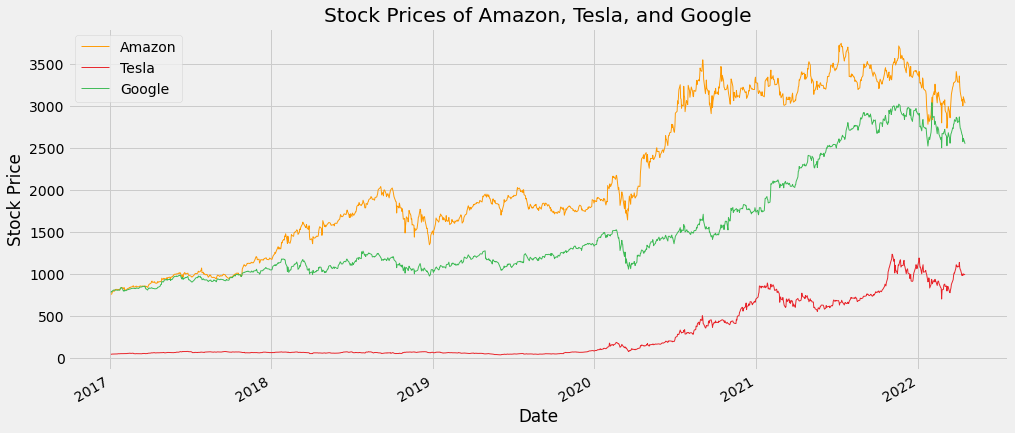

In [17]:
amzn["Open"].plot(label="Amazon", color=amzn_color, linewidth=0.95, figsize=(15,7))
tsla["Open"].plot(label="Tesla", color=tsla_color, linewidth=0.95)
goog["Open"].plot(label="Google", color=goog_color, linewidth=0.95)
plt.legend()
plt.title("Stock Prices of Amazon, Tesla, and Google")
plt.ylabel("Stock Price")
plt.show()

Tesla is by far the least expensive stock, but stock price is largely irrelevant. Let's multiply each company's price by total number of shares outstanding to compare each comapny's value.

To find the total number of shares outstanding for a company, let's create a function that inputs a ticker symbol and returns the number of shares outstanding:

In [18]:
def getSharesOutstanding(ticker):
    if yf.Ticker(ticker).info["sharesOutstanding"]:
        return yf.Ticker(ticker).info["sharesOutstanding"]
    else:
        return "Could not find shares outstanding"

Now, we can apply the function to each of our companies:

In [19]:
amzn_num_shares = getSharesOutstanding("AMZN")
print("AMZN", "{:,}".format(amzn_num_shares))

tsla_num_shares = getSharesOutstanding("TSLA")
print("TSLA", "{:,}".format(tsla_num_shares))

goog_num_shares = getSharesOutstanding("GOOG")
print("GOOG", "{:,}".format(goog_num_shares))

AMZN 507,148,000
TSLA 1,004,259,968
GOOG 317,737,984


We should create a new column that calculates the company value for each day, which is the product of the stock price and the total number of shares outstanding.

In [20]:
amzn["Company Value"] = amzn["Open"] * amzn_num_shares
tsla["Company Value"] = tsla["Open"] * tsla_num_shares
goog["Company Value"] = goog["Open"] * goog_num_shares

Now, we can make a plot that compares the values of our three companies:

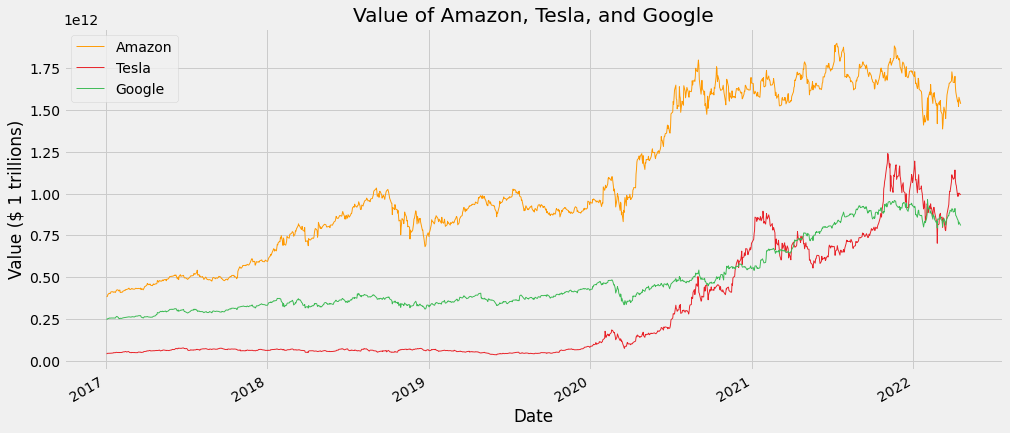

In [21]:
amzn["Company Value"].plot(label="Amazon", color=amzn_color, linewidth=0.95, figsize=(15,7))
tsla["Company Value"].plot(label="Tesla", color=tsla_color, linewidth=0.95)
goog["Company Value"].plot(label="Google", color=goog_color, linewidth=0.95)
plt.legend()
plt.title("Value of Amazon, Tesla, and Google")
plt.ylabel("Value ($ 1 trillions)")
plt.show()

Above, we can see that Amazon worth more than Tesla and Google, but Tesla has surpassed Google after trailing significantly.

<h4>Cumulative Return</h4>

A stock's return on investment represents the percent gain or loss in value of the stock. Let's create a visualization representing a stock's cumulative return, or return on investment each days since our beginning date.

Let's create a new column representing the cumulative return, which represents a ratio between the current (for each day) value and the initial value:

In [22]:
first_day = amzn["Open"].iloc[0]
amzn["Cumulative Return"] = amzn["Open"] / first_day
first_day = tsla["Open"].iloc[0]
tsla["Cumulative Return"] = tsla["Open"] / first_day
first_day = goog["Open"].iloc[0]
goog["Cumulative Return"] = goog["Open"] / first_day

Now, we can create a plot to compare the cumulative returns for each comapny. Keep in mind that every value should start at 1 since it represents the inital price.

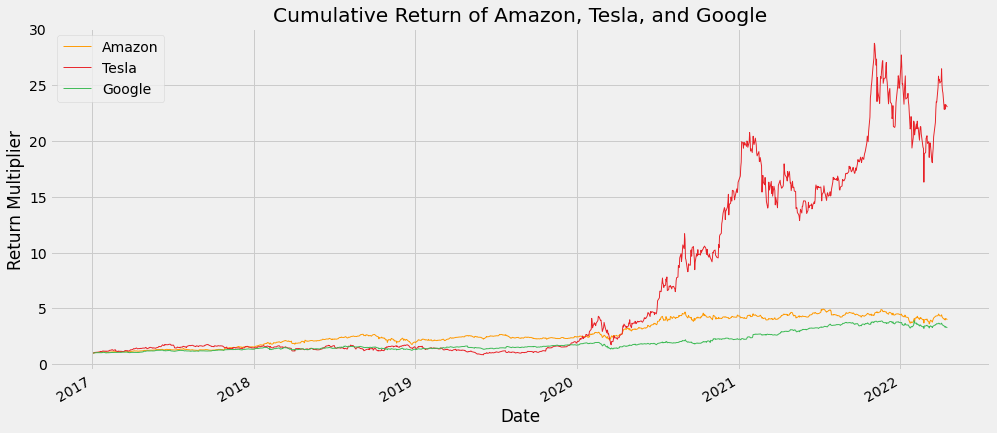

In [23]:
amzn["Cumulative Return"].plot(label="Amazon", color=amzn_color, linewidth=0.95, figsize=(15,7))
tsla["Cumulative Return"].plot(label="Tesla", color=tsla_color, linewidth=0.95)
goog["Cumulative Return"].plot(label="Google", color=goog_color, linewidth=0.95)
plt.legend()
plt.title("Cumulative Return of Amazon, Tesla, and Google")
plt.ylabel("Return Multiplier")
plt.show()

From the plot above, we can tell that Tesla has grown the most by far since the beginning of 2017.

<h4>Volume</h4>

In addition to price and cumulative return, volume is an important metric to consider since it is generally a sign of movement.

Let's plot a visulaization of the volume for each company:

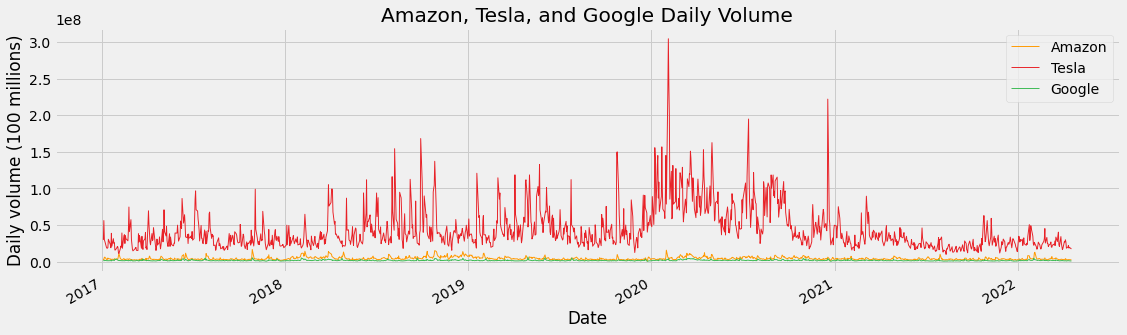

In [24]:
amzn["Volume"].plot(label="Amazon", color=amzn_color, linewidth=0.95, figsize=(17,5))
tsla["Volume"].plot(label="Tesla", color=tsla_color, linewidth=0.95)
goog["Volume"].plot(label="Google", color=goog_color, linewidth=0.95)
plt.legend()
plt.title("Amazon, Tesla, and Google Daily Volume")
plt.ylabel("Daily volume (100 millions)")
plt.show()

These red spikes are interesting, let's check a couple of them out!

In [25]:
#Find row with highest volume
print(tsla["Volume"].argmax())
tsla.iloc[[tsla["Volume"].argmax()]]

776


,Open,High,Low,Close,Adj Close,Volume,Company Value,Cumulative Return
Date,,,,,,,,
2020-02-04,176.591995,193.798004,166.776001,177.412003,177.412003,304694000,1.773443e+11,4.109467


What happened around this time period? Let's do some investigation!

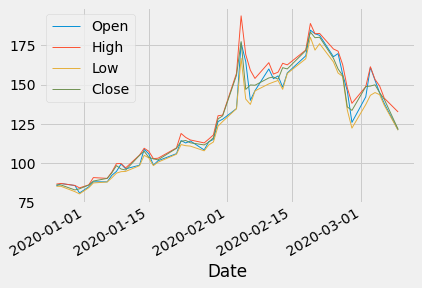

In [26]:
tsla.iloc[750:800]["Open"].plot(linewidth=0.95)
tsla.iloc[750:800]["High"].plot(linewidth=0.95)
tsla.iloc[750:800]["Low"].plot(linewidth=0.95)
tsla.iloc[750:800]["Close"].plot(linewidth=0.95)
plt.legend()
plt.show()

Here is an article from the date of the maximum daily volume for Tesla: 

https://www.cnbc.com/2020/02/04/tesla-stock-surging-yet-again-tsla-jumps-past-800-in-early-trading.html

Volume does not take into account price, so let's compare the total dollar amount traded for each company:

In [27]:
amzn["Dollar Volume"] = amzn["Open"] * amzn["Volume"]
tsla["Dollar Volume"] = tsla["Open"] * tsla["Volume"]
goog["Dollar Volume"] = goog["Open"] * goog["Volume"]

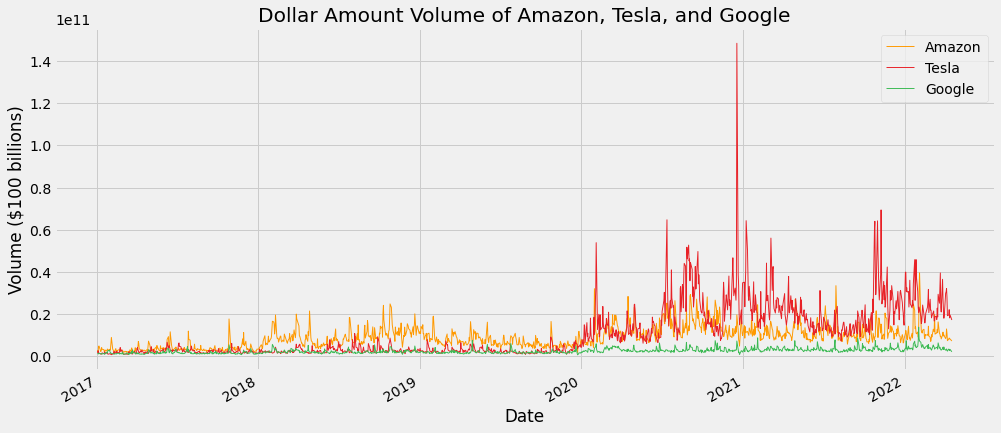

In [28]:
amzn["Dollar Volume"].plot(label="Amazon", color=amzn_color, linewidth=0.95, figsize=(15,7))
tsla["Dollar Volume"].plot(label="Tesla", color=tsla_color, linewidth=0.95)
goog["Dollar Volume"].plot(label="Google", color=goog_color, linewidth=0.95)
plt.legend()
plt.title("Dollar Amount Volume of Amazon, Tesla, and Google")
plt.ylabel("Volume ($100 billions)")
plt.show()

Holy cow! When we factor in share price, we found a new largest daily volume of $14 billion in one day! Let's investgate:

In [29]:
#Find row with highest volume
tsla.iloc[[tsla["Dollar Volume"].argmax()]]

,Open,High,Low,Close,Adj Close,Volume,Company Value,Cumulative Return,Dollar Volume
Date,,,,,,,,,
2020-12-18,668.900024,695.0,628.539978,695.0,695.0,222126200,6.717495e+11,15.56595,1.485802e+11


What happened on that day?

https://www.cnbc.com/2020/12/18/tesla-jumps-6percent-in-heavy-volume-sees-wild-trading-volume-more-than-130-billion-worth-of-stock-changes-hands-ahead-of-sp-add.html

<h4>Volatility</h4>

Volatility is very important when comapring stocks, because is it much more difficult to gain back losses (in terms of percentage). For example, a 50% decrease requires a 100% increase to return to the original value.

For each company, let's calculate the daily return for each day:

In [30]:
amzn["daily_return"] = (amzn["Close"] / amzn["Close"].shift(1)) - 1
tsla["daily_return"] = (tsla["Close"] / tsla["Close"].shift(1)) - 1
goog["daily_return"] = (goog["Close"] / goog["Close"].shift(1)) - 1

Now, let's plot a histogram of the distribution of daily returns for one company.

<AxesSubplot:ylabel='Frequency'>

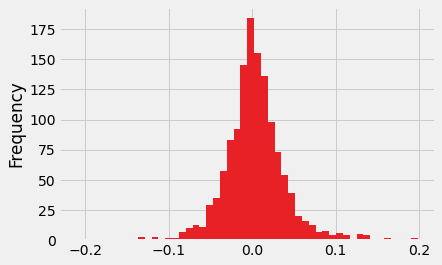

In [31]:
tsla["daily_return"].plot.hist(bins=50, color=tsla_color)

In [32]:
tsla["daily_return"].describe()

count    1331.000000
mean        0.003093
std         0.038319
min        -0.210628
25%        -0.016192
50%         0.001661
75%         0.019807
max         0.198949
Name: daily_return, dtype: float64

From this data, you can see that the security has had 1327 trading days, and averaged a 0.3084 percent gain each day.

That number might sound small (it really isn't), but if a security were to gain 0.3084 percent every trading day in one year (253 days), it would equate to about a 118% gain over an entire year.

In [33]:
#(1 + mean)^253 - 1
mean = tsla["daily_return"].mean()
np.power(1 + mean, 253) - 1

1.1844210388232872

Let's compare all three daily return histograms:

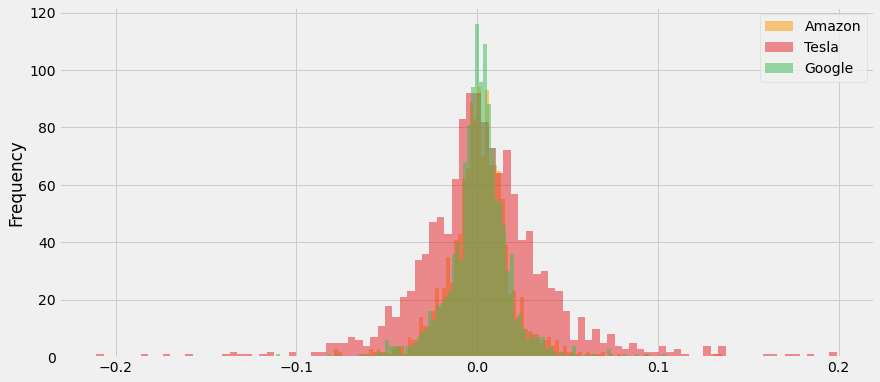

In [34]:
amzn["daily_return"].plot.hist(bins=100, label="Amazon", alpha=0.5, color=amzn_color, figsize=(13,6))
tsla["daily_return"].plot.hist(bins=100, label="Tesla", alpha=0.5, color=tsla_color)
goog["daily_return"].plot.hist(bins=100, label="Google", alpha=0.5, color=goog_color)
plt.legend()
plt.show()

We can tell that Tesla has wider tails that Google and Amazon, which means that it is most likely more volatile. To confirm, let's make a <a href="https://en.wikipedia.org/wiki/Kernel_density_estimation">Kernel density estimation</a> plot, which standardizes the data across the companies, as shown below:

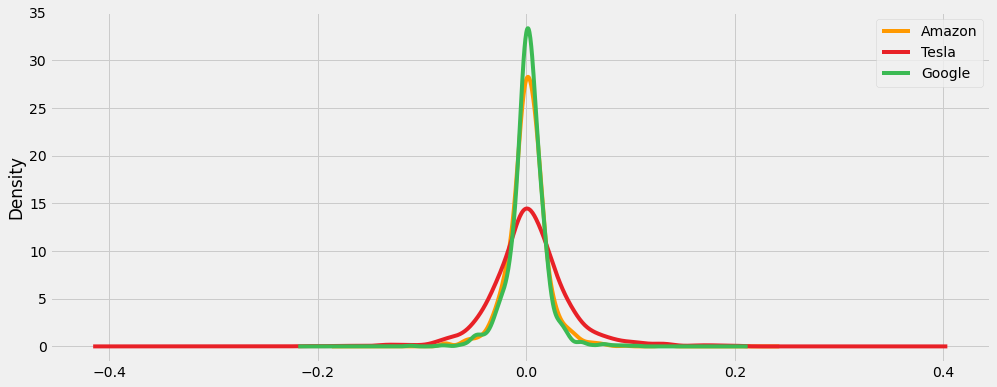

In [35]:
#Kernel Density Estimation
amzn["daily_return"].plot(kind="kde", label="Amazon", color=amzn_color, figsize=(15,6))
tsla["daily_return"].plot(kind="kde", label="Tesla", color=tsla_color)
goog["daily_return"].plot(kind="kde", label="Google", color=goog_color)
plt.legend()
plt.show()

From this graph, we can tell that Google is the least volatile security, Amazon is slightly more volatile, and Tesla is the most volatile.

Let's make some boxplots to compare the price volatilities of each company:

<AxesSubplot:>

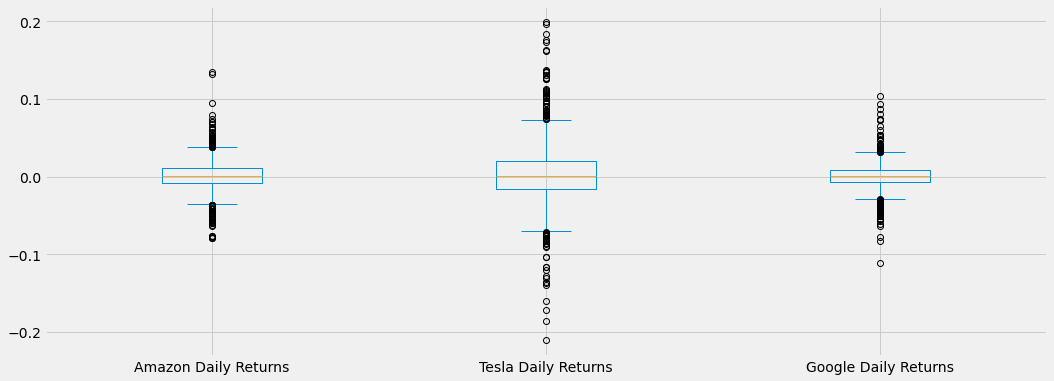

In [36]:
box_df = pd.concat([amzn["daily_return"], tsla["daily_return"], goog["daily_return"]], axis=1)
box_df.columns=["Amazon Daily Returns", "Tesla Daily Returns", "Google Daily Returns"]
box_df.plot(kind="box", figsize=(16,6))

The boxplots confirm the findings from the Kernel density estimation.

<h4>Candlestick Graphing</h4>

Day traders use candlestick graphs to track movement in a stock price throughout the day.

<img src="https://assets.cmcmarkets.com/images/candlestick1_small.png"></img>

If you are interested in learning more about candlesticks, check out this article: https://www.investopedia.com/trading/candlestick-charting-what-is-it/

In [37]:
tsla_day_prices = yf.download(tickers="TSLA",
                            period="1d",
                            interval="5m",
                            auto_adjust=True)
tsla_day_prices = tsla_day_prices.reset_index()
tsla_day_prices

[*********************100%***********************]  1 of 1 completed


,Datetime,Open,High,Low,Close,Volume
0,2022-04-19 09:30:00-04:00,1005.059998,1011.039307,999.232727,1007.565674,1072954
1,2022-04-19 09:35:00-04:00,1007.289978,1007.580017,997.719971,998.559998,400749
2,2022-04-19 09:40:00-04:00,998.565002,1003.700012,995.325012,1001.469971,426805
3,2022-04-19 09:45:00-04:00,1001.729980,1012.000000,1000.109985,1009.000000,556729
4,2022-04-19 09:50:00-04:00,1009.330017,1013.070007,1007.109985,1010.000000,407677
...,...,...,...,...,...,...
74,2022-04-19 15:40:00-04:00,1025.500122,1025.930054,1023.409973,1024.790039,196176
75,2022-04-19 15:45:00-04:00,1024.935059,1027.035034,1023.510010,1026.060059,206582
76,2022-04-19 15:50:00-04:00,1026.329956,1029.030029,1025.516724,1025.516724,319865
77,2022-04-19 15:55:00-04:00,1025.540039,1029.000000,1023.929993,1028.099976,520643


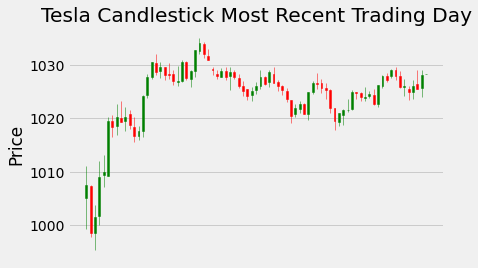

In [38]:
tsla_day_prices["date_ax"] = tsla_day_prices["Datetime"].apply(lambda date: dates.date2num(date))
tsla_tuple = [tuple(vals) for vals in tsla_day_prices[["date_ax", "Open", "High", "Low", "Close"]].values]


fig, ax = plt.subplots()
candlestick_ohlc(ax, tsla_tuple, width=0.0015, colorup="g")
plt.xticks([])
plt.title("Tesla Candlestick Most Recent Trading Day")
plt.ylabel("Price")
plt.show()

From this candlestick graph, we can recognize the price movement of the security for that day. 

Special thanks to the following YouTube videos for providing some of the code that I used in this notebook:
<ol>
    <li><a href>https://www.youtube.com/watch?v=7sFCOunKL_Y</a></li>
    <li><a href>https://www.youtube.com/watch?v=57qAxRV577c</a></li>
</ol>